In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%%time
tweets = pd.read_csv('../data/iranian_tweets_csv_hashed.csv')

CPU times: user 8.95 s, sys: 1.1 s, total: 10.1 s
Wall time: 10.5 s


In [18]:
tweets.head()

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices,includes_trump_or_clinton
0,533622371429543936,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,0.0,0.0,0.0,0.0,NaN,[http://fr.awdnews.com/divertissements/5757-ce...,[574356455],NaN,False
1,527205814906654721,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,0.0,0.0,0.0,0.0,NaN,[http://www.awdnews.com/top-news/10080-an-inqu...,[438542436],NaN,False
2,545166827350134784,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,0.0,0.0,0.0,0.0,NaN,[http://www.awdnews.com/political/10404-cia-pr...,"[823905, 256625456]",NaN,False
3,538045437316321280,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,0.0,0.0,0.0,0.0,NaN,[http://fr.awdnews.com/divertissements/5796-to...,[919513172],NaN,False
4,530053681668841472,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,0.0,0.0,1.0,2.0,NaN,[http://fr.awdnews.com/soci%C3%A9t%C3%A9/5723-...,[83864876],NaN,False


In [19]:
tweets.dtypes

tweetid                        int64
userid                        object
user_display_name             object
user_screen_name              object
user_reported_location        object
user_profile_description      object
user_profile_url              object
follower_count                 int64
following_count                int64
account_creation_date         object
account_language              object
tweet_language                object
tweet_text                    object
tweet_time                    object
tweet_client_name             object
in_reply_to_tweetid          float64
in_reply_to_userid            object
quoted_tweet_tweetid         float64
is_retweet                      bool
retweet_userid                object
retweet_tweetid              float64
latitude                     float64
longitude                    float64
quote_count                  float64
reply_count                  float64
like_count                   float64
retweet_count                float64
h

### Apply lambda

In [4]:
tweets['hashtags'].value_counts()

[]                                                                                                                  557800
[realiran]                                                                                                            2912
[InternationalQudsDay2018, QudsDay4Return, SavePalestine, QudsDay2018, FreePalestine, DeleteIsrael]                   2073
[Iran]                                                                                                                1828
[Realiran]                                                                                                            1575
[السعودية]                                                                                                            1479
[Trump]                                                                                                               1195
[ليبيا_المختار]                                                                                                       1173
[JordanNews]    

In [5]:
tweets['includes_trump_or_clinton'] = tweets['hashtags'].apply(lambda x: 'clinton' in str(x).lower() or 'trump' in str(x).lower())

In [6]:
tweets[tweets['includes_trump_or_clinton'] == True].head(100)

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices,includes_trump_or_clinton
394,964543820389109760,1394743334,RealProgressiveFront,RPFront,United States,“RPFront” is an NGO aims to support people’s m...,https://t.co/f3Ui2iVGkz,7099,921,2013-05-01,...,NaN,0.0,0.0,7.0,9.0,"[notmypresident, fucktrump]",[http://ift.tt/2CoNelW],NaN,NaN,True
417,842984240140763140,e13ac4c5a61faca60ae766c342791c3f6ed8a72d7ad7e5...,e13ac4c5a61faca60ae766c342791c3f6ed8a72d7ad7e5...,e13ac4c5a61faca60ae766c342791c3f6ed8a72d7ad7e5...,"Dallas, TX",Resist and Pray,NaN,2343,2088,2017-03-08,...,NaN,0.0,0.0,0.0,0.0,"[Trump, Merkel, Outrageous, ObamaGate, WaterGate]",[],[2311561],NaN,True
426,951400129356951552,f2a00a04e99197ee4e5fdfac4597bcc048695f6e588ae4...,f2a00a04e99197ee4e5fdfac4597bcc048695f6e588ae4...,f2a00a04e99197ee4e5fdfac4597bcc048695f6e588ae4...,"California,Los Angeles",Journalist,https://t.co/LaseVK51H0,241,316,2018-01-10,...,NaN,0.0,0.0,0.0,0.0,"[Trump, Jerusalem, USembassy, Trump, Wednesday...",[],[853233898398121984],NaN,True
432,946110924645109760,3683769196,Alwaght en Español,AlwaghtEs,NaN,NaN,http://t.co/tBLghK2kws,6817,4374,2015-09-17,...,NaN,0.0,0.0,0.0,0.0,"[Hezbolá, HAMAS, Trump, Quds]",[http://alwaght.com/es/news/120438],[3683769196],NaN,True
433,954617032972087296,853233898398121984,RiseAgainstTheRight,riseagainstr,"California, USA",RiseAgainstTheRight.,NaN,5839,5675,2017-04-15,...,NaN,0.0,0.0,6.0,3.0,"[TrumpShutdown, WSUlive, FridayFeeling, USWNT,...",[http://www.libertyfrontpress.com/fire-and-fur...,NaN,NaN,True
442,910213604422635522,853144291560042496,Berniecrats,berniecratss,United States,As an independent news media organization we a...,NaN,9600,9290,2017-04-15,...,NaN,0.0,0.0,0.0,0.0,"[JokeoftheDay, TrumpTweet, ShadowGovernment]",[],[853144291560042496],NaN,True
494,994122693053206529,cf35b18dbb39a8e6f6983bfae226a11c0c16ff0b2bdbd4...,cf35b18dbb39a8e6f6983bfae226a11c0c16ff0b2bdbd4...,cf35b18dbb39a8e6f6983bfae226a11c0c16ff0b2bdbd4...,"New York, USA",Political Analyst,NaN,450,337,2017-05-06,...,NaN,0.0,0.0,0.0,0.0,"[Trump, IranDeal]",[],NaN,GOOD | BAD,True
564,869453815258525696,1bc6a9b22504e305649652bd85b042cc63ef745dc96c65...,1bc6a9b22504e305649652bd85b042cc63ef745dc96c65...,1bc6a9b22504e305649652bd85b042cc63ef745dc96c65...,NaN,NaN,NaN,1782,22,2017-05-27,...,NaN,0.0,0.0,1.0,0.0,"[Trump, blackhouse, blackhouse_info, Handshake...",[http://blackhouse.info/trumps-awkward-handsha...,NaN,NaN,True
567,909012514255622144,1bc6a9b22504e305649652bd85b042cc63ef745dc96c65...,1bc6a9b22504e305649652bd85b042cc63ef745dc96c65...,1bc6a9b22504e305649652bd85b042cc63ef745dc96c65...,NaN,NaN,NaN,1782,22,2017-05-27,...,NaN,0.0,0.0,0.0,0.0,"[DonaldTrump, MissileTest, NorthKorea, Russi, ...",[http://blackhouse.info/russia-slams-north-for...,NaN,NaN,True
647,952163481905754112,853144291560042496,Berniecrats,berniecratss,United States,As an independent news media organization we a...,NaN,9600,9290,2017-04-15,...,NaN,0.0,0.0,0.0,0.0,"[TrumpSupporters, Trump, TheBachelor]",[http://www.libertyfrontpress.com/apparently-h...,[853144291560042496],NaN,True


In [7]:
tweets_subset = tweets[tweets['includes_trump_or_clinton'] == True]

In [8]:
tweets_subset.dtypes

tweetid                        int64
userid                        object
user_display_name             object
user_screen_name              object
user_reported_location        object
user_profile_description      object
user_profile_url              object
follower_count                 int64
following_count                int64
account_creation_date         object
account_language              object
tweet_language                object
tweet_text                    object
tweet_time                    object
tweet_client_name             object
in_reply_to_tweetid          float64
in_reply_to_userid            object
quoted_tweet_tweetid         float64
is_retweet                      bool
retweet_userid                object
retweet_tweetid              float64
latitude                     float64
longitude                    float64
quote_count                  float64
reply_count                  float64
like_count                   float64
retweet_count                float64
h

In [9]:
tweets_subset['tweet_time'] = tweets_subset['tweet_time'].astype('datetime64[ns]')

/Users/lamthuyvo/Dropbox/projects/social-media-data-book/01-assets/chapter10/data_analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
tweets_subset.dtypes

tweetid                               int64
userid                               object
user_display_name                    object
user_screen_name                     object
user_reported_location               object
user_profile_description             object
user_profile_url                     object
follower_count                        int64
following_count                       int64
account_creation_date                object
account_language                     object
tweet_language                       object
tweet_text                           object
tweet_time                   datetime64[ns]
tweet_client_name                    object
in_reply_to_tweetid                 float64
in_reply_to_userid                   object
quoted_tweet_tweetid                float64
is_retweet                             bool
retweet_userid                       object
retweet_tweetid                     float64
latitude                            float64
longitude                       

In [11]:
tweets_over_time = tweets_subset.set_index('tweet_time')
tweets_over_time.head()

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices,includes_trump_or_clinton
tweet_time,,,,,,,,,,,,,,,,,,,,,
2018-02-16 16:55:00,964543820389109760,1394743334,RealProgressiveFront,RPFront,United States,“RPFront” is an NGO aims to support people’s m...,https://t.co/f3Ui2iVGkz,7099,921,2013-05-01,...,NaN,0.0,0.0,7.0,9.0,"[notmypresident, fucktrump]",[http://ift.tt/2CoNelW],NaN,NaN,True
2017-03-18 06:21:00,842984240140763140,e13ac4c5a61faca60ae766c342791c3f6ed8a72d7ad7e5...,e13ac4c5a61faca60ae766c342791c3f6ed8a72d7ad7e5...,e13ac4c5a61faca60ae766c342791c3f6ed8a72d7ad7e5...,"Dallas, TX",Resist and Pray,NaN,2343,2088,2017-03-08,...,NaN,0.0,0.0,0.0,0.0,"[Trump, Merkel, Outrageous, ObamaGate, WaterGate]",[],[2311561],NaN,True
2018-01-11 10:27:00,951400129356951552,f2a00a04e99197ee4e5fdfac4597bcc048695f6e588ae4...,f2a00a04e99197ee4e5fdfac4597bcc048695f6e588ae4...,f2a00a04e99197ee4e5fdfac4597bcc048695f6e588ae4...,"California,Los Angeles",Journalist,https://t.co/LaseVK51H0,241,316,2018-01-10,...,NaN,0.0,0.0,0.0,0.0,"[Trump, Jerusalem, USembassy, Trump, Wednesday...",[],[853233898398121984],NaN,True
2017-12-27 20:09:00,946110924645109760,3683769196,Alwaght en Español,AlwaghtEs,NaN,NaN,http://t.co/tBLghK2kws,6817,4374,2015-09-17,...,NaN,0.0,0.0,0.0,0.0,"[Hezbolá, HAMAS, Trump, Quds]",[http://alwaght.com/es/news/120438],[3683769196],NaN,True
2018-01-20 07:30:00,954617032972087296,853233898398121984,RiseAgainstTheRight,riseagainstr,"California, USA",RiseAgainstTheRight.,NaN,5839,5675,2017-04-15,...,NaN,0.0,0.0,6.0,3.0,"[TrumpShutdown, WSUlive, FridayFeeling, USWNT,...",[http://www.libertyfrontpress.com/fire-and-fur...,NaN,NaN,True


In [17]:
tweet_tally = tweets_over_time.resample('M').count()
tweet_tally.head()

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices,includes_trump_or_clinton
tweet_time,,,,,,,,,,,,,,,,,,,,,
2013-08-31,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,0,0,1
2013-09-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-10-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-11-30,2,2,2,2,2,2,2,2,2,2,...,0,2,2,2,2,2,2,0,0,2
2013-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
monthly_tweet_count = tweet_tally['tweetid']
monthly_tweet_count.head()

tweet_time
2013-08-31    1
2013-09-30    0
2013-10-31    0
2013-11-30    2
2013-12-31    0
Freq: M, Name: tweetid, dtype: int64

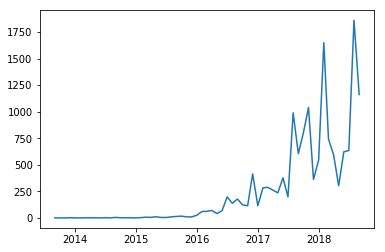

In [14]:
plt.plot(monthly_tweet_count)

In [15]:
len(tweets['tweetid'])

1122936

In [16]:
len(tweets)

1122936